# CS440 PA1
#### Author: Fang Qu
#### UID: UXXXXXXXX
#### Email: hughqu@bu.edu

In [1]:
#Import cell
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)

Populating the interactive namespace from numpy and matplotlib


# Q1 Two Layer Linear 

In [2]:
class LogisticRegression:
    def __init__(self, input_dim, output_dim):
        self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
        self.bias = np.zeros((1, output_dim))
    
    def compute_cost(self,X, y):
                #Computes the total cost on the dataset.
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    def predict(self,X):
                #Makes a prediction based on current model parameters.
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / (exp_z + 1)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    def fit(self,X,y,num_epochs,alpha=0.01):
                #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):
            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            #softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            softmax_scores = exp_z / (exp_z + 1)
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
            # Gradient descent parameter update
            self.theta -= alpha * dtheta
            self.bias -= alpha * dbias   
        return 0

In [3]:
def plot_decision_boundary(model, X, y):
    #Function to print the decision boundary given by model.
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.show()

In [4]:
#load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

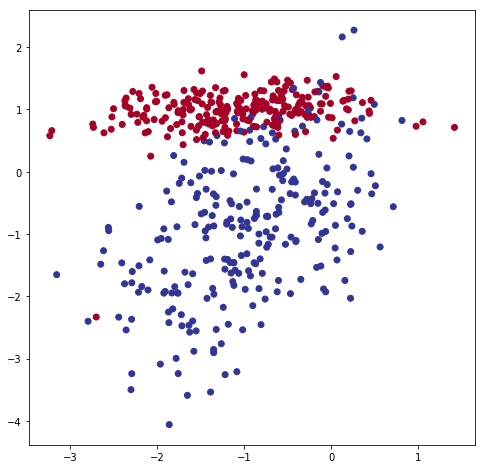

In [5]:
#plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [6]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

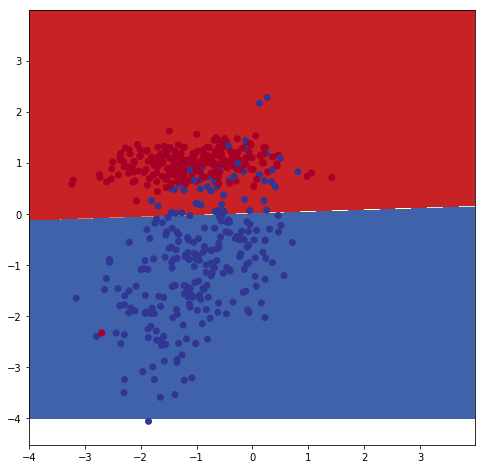

In [7]:
#Plot decision boundary
plot_decision_boundary(logreg, X, y)

In [8]:
#Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

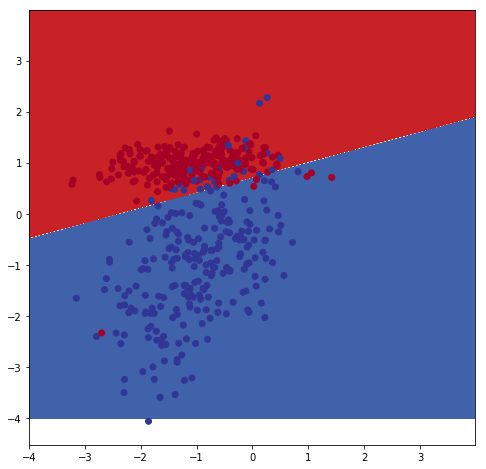

In [9]:
#Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

In [10]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.93
CONFUSION MATRIX: 
 [[ 244.   29.]
 [   6.  221.]]


### Observation:
__For this two-layer neural net implementation, I observed that the result is not bad after training. I got 93% accuracy after training.__


# Q2 Two Layer Nonlinear

In [11]:
#load data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/Nonlineary.csv', delimiter=',').astype(np.int64)

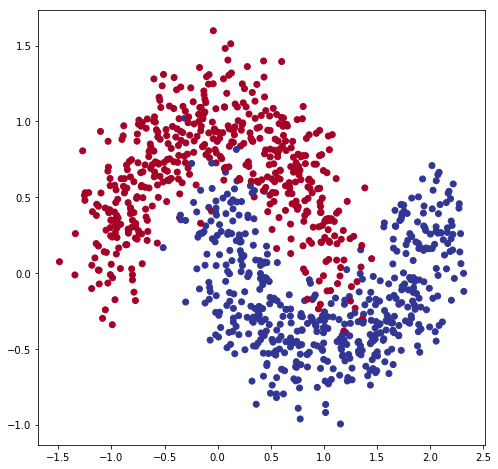

In [12]:
#plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [13]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim)

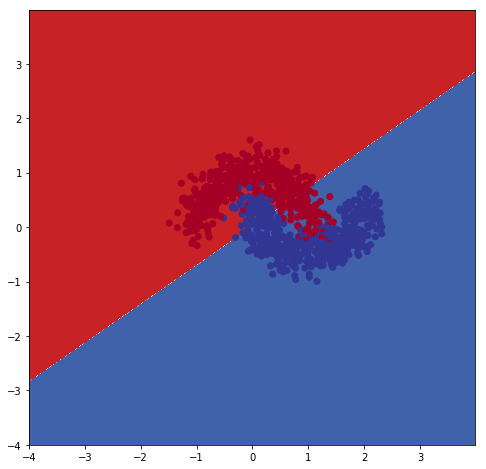

In [14]:
#Plot decision boundary
plot_decision_boundary(logreg, X, y)

In [15]:
#Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

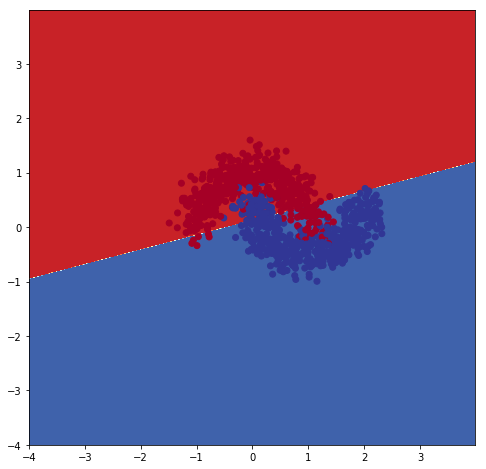

In [16]:
#Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

In [17]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


### Observation:
__Based upon the graph above, it turns out the decision boundary is not that good on non linear dataset even though the accuracy is 87.5%, meaning the training only gives linear result for two layer implementation.__

# Q3 Three Layer Linear

In [18]:
class Neural_Net:
    def __init__(self, input_dim, hidden_dim, output_dim, lr):
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        self.lr = lr
    
    def compute_cost(self, X, y):
        #Computes the total cost on the dataset.
        num_examples = np.shape(X)[0]
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    def predict(self,X):
        #Makes a prediction based on current model parameters.
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / (exp_z + 1)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    def fit(self,X,y,num_epochs):
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):
            # Forward propagation
            z1 = np.dot(X,self.theta1) + self.bias1
            a1 = np.tanh(z1)
            z2 = np.dot(a1,self.theta2) + self.bias2
            exp_z = np.exp(z2)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            # Backpropagation          
            beta1 = softmax_scores
            beta1[range(len(X)),y] -= 1
            beta2 = np.dot(beta1, self.theta2.T) * (1 - np.power(a1,2))
            dtheta2 = np.dot(a1.T, beta1)
            dbias2 = np.sum(beta1, axis=0, keepdims=True)
            dtheta1 = np.dot(X.T, beta2)
            dbias1 = np.sum(beta2, axis=0, keepdims=True)
            # Gradient descent parameter update
            self.theta1 -= self.lr * dtheta1
            self.bias1 -= self.lr * dbias1
            self.theta2 -= self.lr * dtheta2
            self.bias2 -= self.lr * dbias2
        return 0

In [19]:
#load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

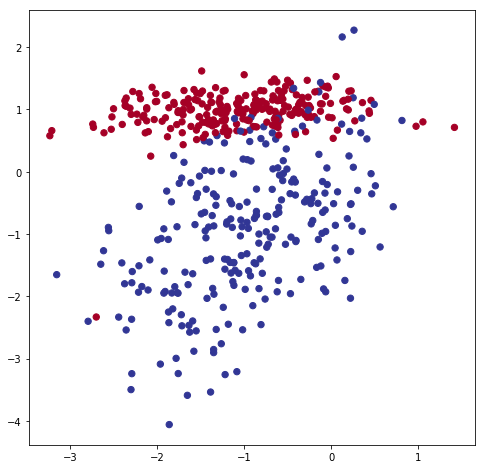

In [20]:
#plot data
plt.scatter(X[:,0], X[:,1],s=40, c=y, cmap=plt.cm.RdYlBu) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [21]:
#Initialize model
input_dim = np.shape(X)[1]
hidden_dim = 3
output_dim = np.max(y) + 1
epslion = 0.01
Neural_net1 = Neural_Net(input_dim, hidden_dim, output_dim,epslion)

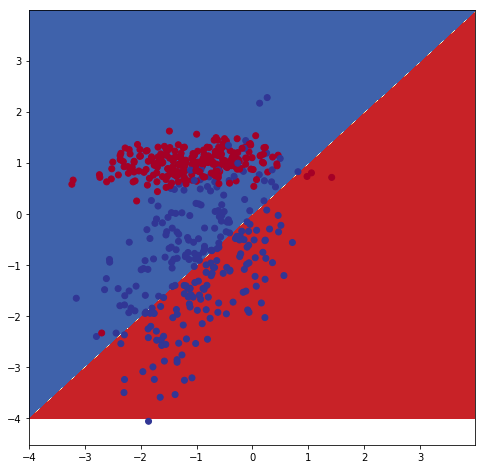

In [22]:
#Plot decision boundary
plot_decision_boundary(Neural_net1, X, y)

In [23]:
#Train the model
Neural_net1.fit(X, y,5000)
;

''

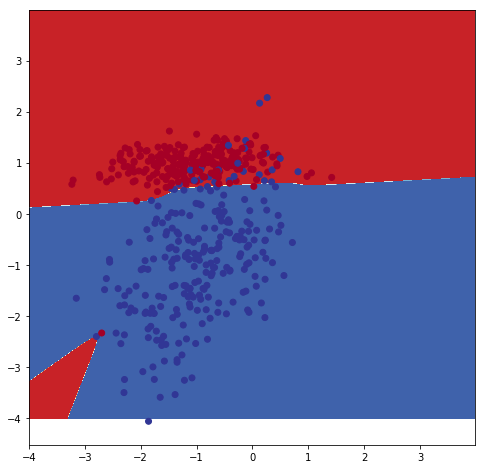

In [24]:
#Plot decision boundary after trainning
plot_decision_boundary(Neural_net1, X, y)

In [25]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = Neural_net1.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.938
CONFUSION MATRIX: 
 [[ 248.   29.]
 [   2.  221.]]


### Observation:
__Since we have an additional hidden layer between input layer and output layer, then this decision boundary is doing better than the two layer case, which means the result decision boundary is not linear but more accurate.__

# Q3 Three Layer Nonlinear

In [26]:
#load data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Nonlineary.csv', delimiter=',').astype(np.int64)

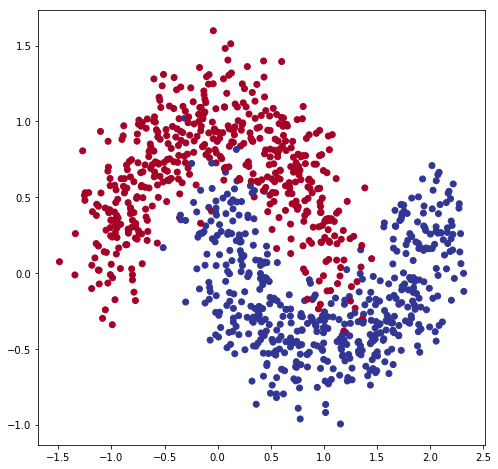

In [27]:
#plot data
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.RdYlBu) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [28]:
#Initialize model
input_dim = np.shape(X)[1]
hidden_dim = 3
output_dim = np.max(y) + 1
epslion=0.01
Neural_net2 = Neural_Net(input_dim, hidden_dim, output_dim,epslion)

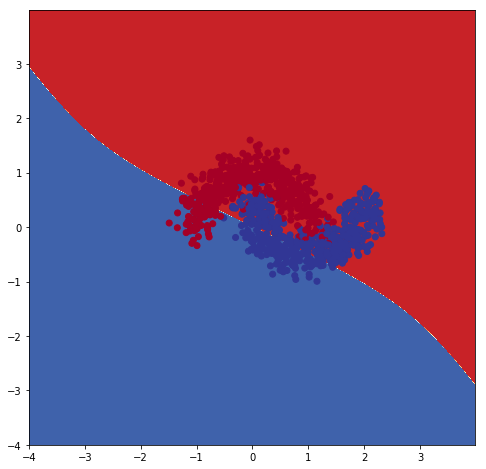

In [29]:
#Plot decision boundary
plot_decision_boundary(Neural_net2, X, y)

In [30]:
#Train the model
Neural_net2.fit(X, y,5000)
;

''

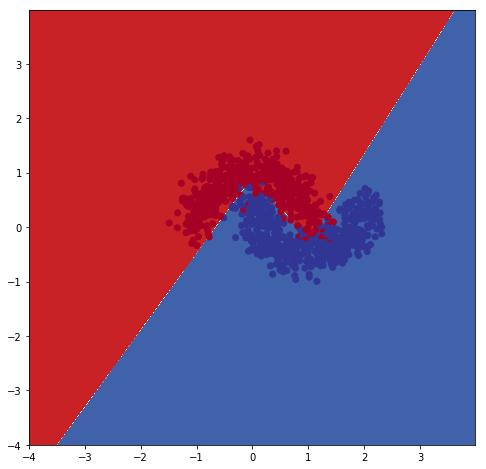

In [31]:
#Plot decision boundary after trainning
plot_decision_boundary(Neural_net2, X, y)

In [32]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = Neural_net2.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.964
CONFUSION MATRIX: 
 [[ 472.    8.]
 [  28.  492.]]


### Observation:
__For this three layer implementation for non linear data, it performs great for the decision boundary result. The backpropagation algorithm, gives an efficient way to compute partial derivatives and we can now repeatedly take steps of gradient descent to reduce our cost function.__

# Q4 Different Learning Rate

In [33]:
def plot_helper(X, y):
    a = [0] * 20
    for i in range(0,20):
        num_epochs = i * 20
        Neural_net.fit(X, y, num_epochs)
        a[i] = Neural_net.compute_cost(X,y)
    return a

In [34]:
#Load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

In [35]:
#Initialize model
input_dim = np.shape(X)[1]
hidden_dim = 3
output_dim = np.max(y) + 1
num_epochs = 5000

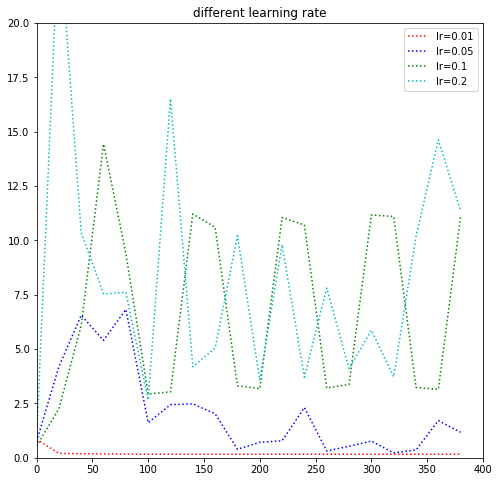

In [36]:
LR = [0.01,0.05,0.1,0.2]
matrix=[]
for i in range (len(LR)):
    lr = LR[i]
    Neural_net = Neural_Net(input_dim, hidden_dim, output_dim, lr)
    matrix.append(plot_helper(X,y))

plt.axis([0, 400, 0, 20])
x_label = [x * 20 for x in range(20)]
plt.plot(x_label,matrix[0],'r:',label='lr=0.01')
plt.plot(x_label,matrix[1],'b:',label='lr=0.05')
plt.plot(x_label,matrix[2],'g:',label='lr=0.1')
plt.plot(x_label,matrix[3],'c:',label='lr=0.2')
plt.title("different learning rate")
plt.legend(loc='best')
plt.show()

### Observation:
__For this question, I tested 4 learning rates 0.01, 0.05, 0.1 and 0.2. The result can be seen on this plot above. Since learning rate is multiplying each derivative by learning rate before they subtract it from its corresponding weight, then I tested different learning rate to measure their performance. As a result, 0.01 is the ideal one.__

# Q5 differnet numbers of hidden layer nodes

In [37]:
#Load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

In [38]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
lr = 0.01
num_epochs = 5000

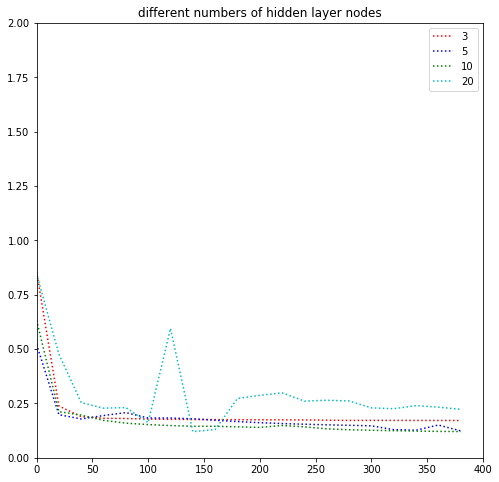

In [39]:
hidden = [3,5,10,20]
matrix=[]
for i in range (len(hidden)):
    hidden_dim = hidden[i]
    Neural_net = Neural_Net(input_dim, hidden_dim, output_dim, lr)
    matrix.append(plot_helper(X,y))

plt.axis([0, 400, 0, 2])
x_label = [x * 20 for x in range(20)]
plt.plot(x_label,matrix[0],'r:',label='3')
plt.plot(x_label,matrix[1],'b:',label='5')
plt.plot(x_label,matrix[2],'g:',label='10')
plt.plot(x_label,matrix[3],'c:',label='20')
plt.title("different numbers of hidden layer nodes")
plt.legend(loc='best')
plt.show()

### Observation:
__Based upon the plot above, I believe the number of hidden layer nodes does not really matter in this case. For $n=20$, it does not fluctuate that much and does not influence the performance overall.__

# Q6 Overfitting

In statistics, __overfitting__ is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An __overfitted model__ is a statistical model that contains more parameters than can be justified by the data.
Three ways to reduce __overfitting__:
1. collect more data
2. use ensembling methods that “average” models
3. choose simpler models / penalize complexity

For the first point, it may help to plot learning curves, plotting the training vs. the validation or cross-validation performance. If you see a trend that more data helps with closing the cap between the two, and if you could afford collecting more data, then this would probably the best choice.

In my experience, ensembling is probably the most convenient way to build robust predictive models on somewhat small-sized datasets. As in real life, consulting a bunch of “experts” is usually not a bad idea before making a decision.

Regarding the third point, I usually start a predictive modeling task with the simplest model as a benchmark: usually logistic regression. Overfitting can be a real problem if our model has too much capacity — too many model parameters to fit, and too many hyperparameters to tune. If the dataset is small, a simple model is always a good option to prevent overfitting, and it is also a good benchmark for comparison to more “complex” alternatives.

# Q7 $L_2$ Regularization

Regularization helps to solve over fitting problem in machine learning. Simple model will be a very poor generalization of data. At the same time, complex model may not perform well in test data due to over fitting. We need to choose the right model in between simple and complex model. Regularization helps to choose preferred model complexity, so that model is better at predicting. Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. It can be used for many machine learning algorithms. I have attempted to explain the regularization parameter interpretation and how regularization solves over fitting problem using the ridge regression.

The ridge regression uses $L_2$ norm for regularization.

In [40]:
regularization = 0.8
class Neural_Net:
    def __init__(self, input_dim, hidden_dim, output_dim, lr):
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
        self.bias2 = np.zeros((1, output_dim))
        self.lr = lr
    
    def compute_cost(self, X, y):
        #Computes the total cost on the dataset.
        num_examples = np.shape(X)[0]
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    def predict(self,X):
        #Makes a prediction based on current model parameters.
        z1 = np.dot(X,self.theta1) + self.bias1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,self.theta2) + self.bias2
        exp_z = np.exp(z2)
        softmax_scores = exp_z / (exp_z + 1)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    def fit(self,X,y,num_epochs):
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):
            # Forward propagation
            z1 = np.dot(X,self.theta1) + self.bias1
            a1 = np.tanh(z1)
            z2 = np.dot(a1,self.theta2) + self.bias2
            exp_z = np.exp(z2)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            # Backpropagation          
            beta1 = softmax_scores
            beta1[range(len(X)),y] -= 1
            beta2 = np.dot(beta1, self.theta2.T) * (1 - np.power(a1,2))
            dtheta2 = np.dot(a1.T, beta1)
            dbias2 = np.sum(beta1, axis=0, keepdims=True)
            dtheta1 = np.dot(X.T, beta2)
            dbias1 = np.sum(beta2, axis=0, keepdims=True)
            # Gradient descent parameter update
            self.theta1 -= self.lr * dtheta1
            self.bias1 -= self.lr * dbias1
            self.bias1 *=  regularization
            self.theta2 -= self.lr * dtheta2
            self.bias2 -= self.lr * dbias2
            self.bias2 *=  regularization
        return 0

In [41]:
#load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

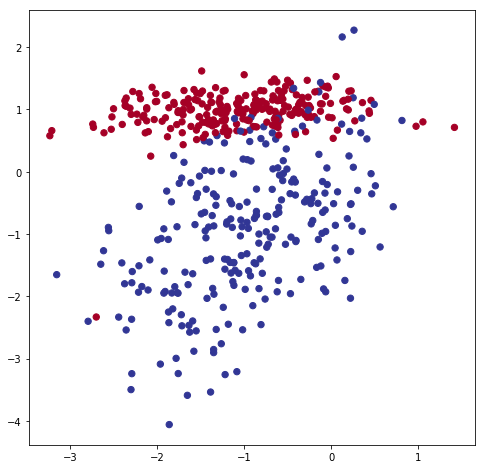

In [42]:
#plot data
plt.scatter(X[:,0], X[:,1],s=40, c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [43]:
#Initialize model
input_dim = np.shape(X)[1]
hidden_dim = 3
output_dim = np.max(y) + 1
epslion=0.01
Neural_net2 = Neural_Net(input_dim, hidden_dim, output_dim,epslion)

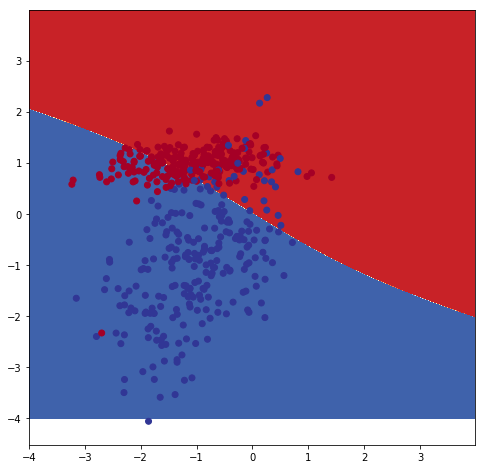

In [44]:
#Plot decision boundary
plot_decision_boundary(Neural_net2, X, y)

In [45]:
#Train the model
Neural_net2.fit(X, y,5000)
;

''

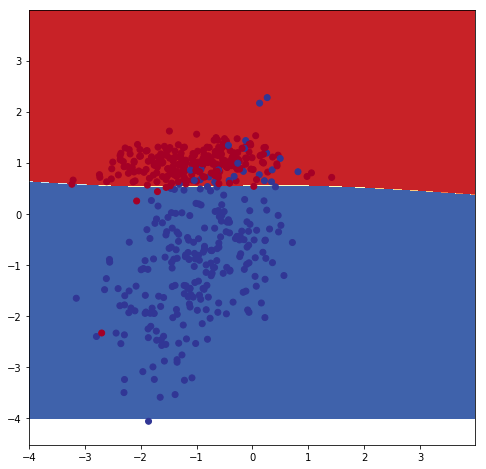

In [46]:
#Plot decision boundary after trainning
plot_decision_boundary(Neural_net2, X, y)

In [47]:
#Compute accuracy and confusion matrix
acc = 0
y_pred = Neural_net2.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.938
CONFUSION MATRIX: 
 [[ 245.   26.]
 [   5.  224.]]


### Observation:
__Since the original dataset does not have major overfitting issue, then I only applied a $\frac{0.9}{1.0}$ regularization for each theta value and the final accuracy value does not change that much.__